In [2]:
import pandas as pd
import numpy as np

### ref10 data preprocessing

In [4]:
# 파일 불러오기
ref10 = pd.read_excel('./ref10_3rdSheet.xlsx', sheet_name='Table S2. Sample level info')
ref10.columns

Index(['sample', 'patient', 'time', 'aCTLA4_response', 'aPD1_response',
       'tumor_purity', 'n_nonsynonymous', 'n_neoantigen',
       'n_clones_by_expands', 'n_clones_by_sciclone', 'n_copy_gain',
       'n_copy_loss'],
      dtype='object')

In [10]:
# head, tail 찍어보기
display(ref10.head())
display(ref10.tail())

,sample,patient,time,aCTLA4_response,aPD1_response,tumor_purity,n_nonsynonymous,n_neoantigen,n_clones_by_expands,n_clones_by_sciclone,n_copy_gain,n_copy_loss
0,31A,31,preCTLA4,response,NaN,0.85,819,997,9,2,88.0,0.0
1,34A,34,preCTLA4,nonresponse,response,0.85,3123,5628,17,6,917.0,1129.0
2,50A,50,preCTLA4,nonresponse,nonresponse,0.95,3445,6037,17,2,1008.0,1581.0
3,9A,9,preCTLA4,nonresponse,response,0.85,84,117,5,3,674.0,2400.0
4,5A,5,preCTLA4,response,NaN,0.95,404,296,6,3,0.0,0.0


,sample,patient,time,aCTLA4_response,aPD1_response,tumor_purity,n_nonsynonymous,n_neoantigen,n_clones_by_expands,n_clones_by_sciclone,n_copy_gain,n_copy_loss
48,49E,49,postPD1,nonresponse,nonresponse,0.90,1439,2473,16,3,158.0,2979.0
49,20E,20,postPD1,nonresponse,nonresponse,0.85,2484,3950,10,5,NaN,NaN
50,42E,42,postPD1,nonresponse,nonresponse,0.95,212,287,10,6,688.0,2989.0
51,45E,45,postPD1,nonresponse,nonresponse,0.85,499,184,12,1,NaN,NaN
52,2E,2,postPD1,nonresponse,nonresponse,0.90,211,172,11,3,1570.0,2815.0


In [11]:
# 사용할 컬럼: 'sample', 'aPD1_response','n_neoantigen'
ref10 = ref10[['sample', 'aPD1_response','n_neoantigen']]
ref10.head()

,sample,aPD1_response,n_neoantigen
0,31A,NaN,997
1,34A,response,5628
2,50A,nonresponse,6037
3,9A,response,117
4,5A,NaN,296


In [14]:
# 결측치 확인해보기 (꼭 output과 같게 출력될 필요는 없고, output처럼 결측치를 확인할 수 있는 형식으로 출력하면 됨)
ref10.isnull().sum()

sample           0
aPD1_response    6
n_neoantigen     0
dtype: int64

In [15]:
# 결측치 제거 후 잘 제거됐나 확인 (꼭 output과 같게 출력될 필요는 없고, output처럼 결측치를 확인할 수 있는 형식으로 출력하면 됨)
ref10.dropna(inplace=True)
ref10 = ref10.dropna()
ref10.isnull().sum()

sample           0
aPD1_response    0
n_neoantigen     0
dtype: int64

In [16]:
# answer이라는 컬럼명으로 aPD1_response의 값에 따라 분류하세요
## response이면 answer값 1, nonresponse이면 answer 값 0
ref10['answer'] = ref10['aPD1_response'].map(lambda x: 1 if x == 'response' else 0)
ref10.head()

,sample,aPD1_response,n_neoantigen,answer
1,34A,response,5628,1
2,50A,nonresponse,6037,0
3,9A,response,117,1
5,7A,response,115,1
6,25A,nonresponse,477,0


### ref24 data preprocessing

In [38]:
ref24 = pd.read_excel('./ref24_1stSheet.xlsx', skiprows=[0])
ref24

,#,Study ID,"Cohort (Discovery, Validation)",Histology,Age (years),Sex,Smok.^,Pack-years,PD-L1*,Priors^^,Dose (mg/kg),Sched.**,PFS (mos),Event ^^^,Resp ^^^^,Durable Clinical Benefit,Nonsyn.,Smok. Sig. ^^^^^,Neoant.,Total exonic
0,1,SA9755,Valid,NSCLC NOS,63.0,F,Former,36.00,Weak,1.0,10.0,3.0,8.366667,0.0,PR,DCB,1192.0,TH,576.0,1732.0
1,2,HE3202,Disc,Adeno,63.0,F,Former,58.00,Strong,3.0,10.0,3.0,14.666667,0.0,PR,DCB,746.0,TH,610.0,1011.0
2,3,TU0428,Disc,Adeno,66.0,M,Current,48.00,Negative,0.0,10.0,3.0,2.066667,1.0,POD,NDB,626.0,TH,446.0,992.0
3,4,Y2087,Valid,Adeno,68.0,F,Never,0.00,Weak,5.0,10.0,3.0,8.333333,1.0,SD,DCB,507.0,TL,358.0,914.0
4,6,RI1933,Disc,Adeno,60.0,F,Former,21.00,Strong,1.0,10.0,3.0,16.600000,0.0,PR,DCB,473.0,TH,228.0,622.0
5,5,M4945,Valid,Adeno,66.0,M,Former,40.00,Unknown,3.0,10.0,2.0,14.600000,0.0,PR,DCB,427.0,TH,300.0,685.0
6,7,ZA6505,Valid,Adeno,76.0,F,Never,0.00,Negative,6.0,10.0,3.0,1.933333,1.0,POD,NDB,378.0,TL,209.0,558.0
7,8,CU9061,Valid,Squam,57.0,M,Former,39.00,Weak,1.0,2.0,3.0,3.966667,0.0,SD,NR,368.0,TH,271.0,552.0
8,9,CA9903,Disc,Adeno,57.0,M,Former,80.00,Strong,3.0,10.0,3.0,14.500000,1.0,PR,DCB,324.0,TH,226.0,494.0
9,12,KA3947,Disc,Adeno,64.0,F,Former,52.50,Strong,0.0,10.0,3.0,8.133333,1.0,SD,DCB,302.0,TH,114.0,426.0


In [39]:
# ref24의 index값 33까지 행만 사용하기 위해, 33까지 추출 후 ref24.tail() 출력해보기
ref24 = ref24[:34]
ref24.tail()

,#,Study ID,"Cohort (Discovery, Validation)",Histology,Age (years),Sex,Smok.^,Pack-years,PD-L1*,Priors^^,Dose (mg/kg),Sched.**,PFS (mos),Event ^^^,Resp ^^^^,Durable Clinical Benefit,Nonsyn.,Smok. Sig. ^^^^^,Neoant.,Total exonic
29,30,GR0134,Valid,Adeno,80.0,M,Former,56.00,Negative,0.0,10.0,3.0,8.300000,1.0,PR,DCB,56.0,TL,30.0,94.0
30,32,NI9507,Valid,Adeno,41.0,F,Current,2.25,Weak,1.0,10.0,3.0,1.866667,1.0,POD,NDB,35.0,TL,18.0,85.0
31,33,AU5884,Disc,Adeno,64.0,M,Former,10.00,Weak,2.0,10.0,2.0,1.833333,1.0,POD,NDB,34.0,TL,27.0,80.0
32,31,VA1330,Disc,Adeno,71.0,F,Former,0.50,Unknown,1.0,10.0,3.0,4.133333,1.0,SD,NDB,22.0,TL,11.0,88.0
33,34,VA7859,Disc,Adeno,57.0,F,Former,3.15,Unknown,1.0,10.0,3.0,6.266667,1.0,SD,NDB,11.0,TL,8.0,45.0


In [40]:
# columns 명 출력
ref24.columns

Index(['#', 'Study ID', 'Cohort (Discovery, Validation)', 'Histology',
       'Age (years)', 'Sex', 'Smok.^', 'Pack-years', 'PD-L1*', 'Priors^^',
       'Dose (mg/kg)', 'Sched.**', 'PFS (mos)', 'Event ^^^', 'Resp  ^^^^',
       'Durable Clinical Benefit', 'Nonsyn. ', 'Smok. Sig. ^^^^^', 'Neoant. ',
       'Total exonic'],
      dtype='object')

In [41]:
# 'Study ID', 'PD-L1*', 'Neoant. ' 해당 컬럼명들만 사용하기 위해, 해당 컬럼만 추출 후 ref24.head() 로 잘 뽑혔나 출력
ref24 = ref24[['Study ID', 'PD-L1*', 'Neoant. ']]
ref24.head()

,Study ID,PD-L1*,Neoant.
0,SA9755,Weak,576.0
1,HE3202,Strong,610.0
2,TU0428,Negative,446.0
3,Y2087,Weak,358.0
4,RI1933,Strong,228.0


In [42]:
# 'PD-L1*' 컬럼의 고유한 값들 조회
ref24['PD-L1*'].unique()

array(['Weak', 'Strong', 'Negative', 'Unknown'], dtype=object)

In [43]:
# ref24['PD-L1*']의 값이 'Unknown' 이 아닌 것들만 추출한 후, 다시 'PD-L1*' 컬럼의 고유한 값들 조회
ref24 = ref24[ref24['PD-L1*']!='Unknown']
ref24['PD-L1*'].unique()

array(['Weak', 'Strong', 'Negative'], dtype=object)

In [44]:
# ref24['answer'] 이라는 컬럼을 새로 만듭니다. 
# 이 컬럼의 값은 1 또는 0이 오는데
# 1: ref24['PD-L1*']의 값이 'Strong' 또는 'Weak'인 경우
# 0: ref24['PD-L1*']의 값이 'Neagtive'인 경우

## 방법1.
answer = [1 if x == ('Weak' or 'Strong') else 0 for x in ref24['PD-L1*']]
ref24['answer'] = answer
ref24.head()

## 방법2.
ref24['answer'] = ref24['PD-L1*'].apply(lambda x: 1 if x == ('Weak' or 'Strong') else 0)

### ref25 data preprocessing

In [70]:
ref25 = pd.read_excel('./ref25_1stSheet.xlsx', skiprows=[0, 1], sheet_name='Table S2')

In [71]:
ref25

,Unique Subject Identifier,Patient ID,ECOG performance status,Age (yrs),Sex,Smoking Status (cigarettes only),Histology,% PD-L1 expression,PFS (months),"PFS (0=censor, 1=event)",Best Overall Response,"Clinical benefit (DCB = durable clinical benefit, NDB = no durable benefit",Nonsynonymous tumor mutation burden,Predicted neoantigen burden,HLA_A1 allele,HLA_A2 alleles,HLA_B1 alleles,HLA_B2 alleles,HLA_C1 alleles,HLA_C2 alleles
0,CA209012-13-156,1,0,70,female,former,non-squamous,2,1.4127,1,PD,NDB,60,160,A*29:02,A*24:02,B*44:03,B*40:01,C*03:04,C*16:01
1,CA209012-13-166,2,0,72,male,former,squamous,98,6.8008,1,PR,DCB,210,216,A*01:01,A*25:01,B*08:01,B*15:18,C*07:04,C*07:01
2,CA209012-13-170,3,1,61,female,never,non-squamous,80,1.4784,0,SD,NDB,12,32,A*02:03,A*02:07,B*46:01,B*38:02,C*01:03,C*07:02
3,CA209012-10-182,4,1,64,male,current,squamous,2,3.7782,1,SD,NDB,111,263,A*02:01,A*11:01,B*45:01,B*51:01,C*02:02,C*06:02
4,CA209012-10-187,5,0,57,male,never,non-squamous,0,7.5565,1,SD,DCB,135,451,A*02:01,A*26:01,B*55:01,B*40:01,C*03:03,C*03:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,CA209012-1-454,72,1,47,male,never,non-squamous,20,2.2998,1,PD,NDB,19,9,A*32:01,A*25:01,B*08:01,B*27:05,C*02:02,C*07:01
71,CA209012-4-463,73,0,57,female,former,non-squamous,3,16.4600,0,PR,DCB,1097,2051,A*31:01,A*01:01,B*08:01,B*27:05,C*02:02,C*07:01
72,CA209012-1-467,74,1,42,male,former,non-squamous,15,7.9836,1,SD,DCB,625,1295,A*03:01,A*26:01,B*44:02,B*38:01,C*07:04,C*12:03
73,CA209012-10-468,43,1,58,female,former,non-squamous,0,5.0924,1,SD,NDB,261,517,A*68:01,A*01:01,B*08:01,B*35:08,C*07:01,C*04:01


In [68]:
# ref25의 columns 출력
ref25.columns

Index(['sample', 'pd1_response', 'neoantigen_burden', 'answer'], dtype='object')

In [72]:
# 'Patient ID', 'Best Overall Response', 'Predicted neoantigen burden' 컬럼만 추출 후 .head()
ref25 = ref25[['Patient ID', 'Best Overall Response', 'Predicted neoantigen burden']]
ref25.head()

,Patient ID,Best Overall Response,Predicted neoantigen burden
0,1,PD,160
1,2,PR,216
2,3,SD,32
3,4,SD,263
4,5,SD,451


In [73]:
# 'Best Overall Response' 컬럼의 고유값 확인
ref25['Best Overall Response'].unique()

array(['PD', 'PR', 'SD', 'NE', 'CR'], dtype=object)

In [74]:
# 'Best Overall Response'컬럼의 값이 R로 끝나면 answer 컬럼에 1을, R로 끝나지 않으면 0을 넣어줌
ref25['answer'] = ref25['Best Overall Response'].map(lambda x: 1 if x.endswith('R') else 0)
ref25.head()

/var/folders/0g/gwx4n2qn4hgd1lx3_hf50ffr0000gn/T/ipykernel_2192/2185788089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref25['answer'] = ref25['Best Overall Response'].map(lambda x: 1 if x.endswith('R') else 0)


,Patient ID,Best Overall Response,Predicted neoantigen burden,answer
0,1,PD,160,0
1,2,PR,216,1
2,3,SD,32,0
3,4,SD,263,0
4,5,SD,451,0


### ref21 data preprocessing

In [80]:
ref21 = pd.read_excel('./ref21_2ndSheet.xlsx', sheet_name = 'exome analysis (n=110)')
ref21.head()

/opt/anaconda3/envs/lab/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,patient,age_start,gct,RECIST,overall_survival,progression_free,primary,group,histology,stage,...,snps,mutations,mtc_tumor,mtc_normal,hla.a1,hla.a2,hla.b1,hla.b2,hla.c1,hla.c2
0,Pat02,42,1,SD,1632,538,occult,response,Unknown or NA,Stage 4,...,332,378,125.846615,34.933691,HLA-A02:01,HLA-A26:01,HLA-B08:01,HLA-B07:02,HLA-C07:02,HLA-C07:02
1,Pat03,61,1,PD,100,76,skin,nonresponse,Acrolentigenous,Stage 4,...,590,602,228.711135,158.387861,HLA-A03:01,HLA-A29:01,HLA-B07:05,HLA-B35:01,HLA-C15:05,HLA-C04:01
2,Pat04,71,1,PR,987,646,skin,response,Nodular,Stage 4,...,509,527,228.137869,182.495884,HLA-A01:01,HLA-A02:01,HLA-B15:01,HLA-B44:05,HLA-C02:02,HLA-C03:03
3,Pat06,33,1,PD,161,77,skin,nonresponse,Superficial spreading,Stage 4,...,232,295,156.646653,26.102230,HLA-A11:01,HLA-A02:01,HLA-B27:02,HLA-B55:01,HLA-C03:03,HLA-C02:02
4,Pat07,36,0,SD,1050,721,skin,response,Unknown or NA,Stage 3,...,224,235,216.280881,133.963184,HLA-A01:01,HLA-A01:01,HLA-B07:02,HLA-B08:01,HLA-C07:02,HLA-C07:01


In [81]:
ref21.columns

Index(['patient', 'age_start', 'gct', 'RECIST', 'overall_survival',
       'progression_free', 'primary', 'group', 'histology', 'stage', 'M',
       'gender', 'date_birth', 'LDH', 'pre_therapies', 'pre_BRAF', 'post_BRAF',
       'therapy_start', 'therapy_end', 'date_death', 'dead',
       'date_progression', 'progression', 'neos500', 'neos250', 'neos100',
       'neos50', 'synonymous', 'nonsynonymous', 'indels', 'snps', 'mutations',
       'mtc_tumor', 'mtc_normal', 'hla.a1', 'hla.a2', 'hla.b1', 'hla.b2',
       'hla.c1', 'hla.c2'],
      dtype='object')

In [82]:
# 'patient', 'group', 'neos500' 컬럼만 추출 후 .head()
ref21 = ref21[['patient', 'group', 'neos500']]
ref21.head()

,patient,group,neos500
0,Pat02,response,244
1,Pat03,nonresponse,475
2,Pat04,response,568
3,Pat06,nonresponse,382
4,Pat07,response,147


In [83]:
# 'group' 컬럼의 고유한 값만 출력
ref21['group'].unique()

array(['response', 'nonresponse', 'long-survival'], dtype=object)

In [84]:
# ref21['group'] 컬럼에서 response와 nonresponse 값만 추출
ref21 = ref21[ref21['group'].isin(['response', 'nonresponse'])]
ref21['group'].unique()
# ref21 = ref21[~ref21['group'].str.contains('long')] # group 컬럼에서 'long'이란 문자열 포함한 것 제거
# ref21 = ref21[~ref21['group'].isin(['long-survival'])]

array(['response', 'nonresponse'], dtype=object)

In [85]:
# ref21['group']의 값이 response이면 -> answer컬럼에 1을 
# ref21['group']의 값이 nonresponse이면 -> answer컬럼에 0을 
ref21['answer'] = ref21['group'].map(lambda x: 1 if x == 'response' else 0)
ref21

,patient,group,neos500,answer
0,Pat02,response,244,1
1,Pat03,nonresponse,475,0
2,Pat04,response,568,1
3,Pat06,nonresponse,382,0
4,Pat07,response,147,1
...,...,...,...,...
105,Pat86,nonresponse,111,0
106,Pat88,response,2285,1
107,Pat90,response,330,1
108,Pat92,nonresponse,21,0


In [86]:
# ref21, ref10, ref25, ref24의 컬럼명을 'sample', 'pd1_response','neoantigen_burden','answer' 로 수정하여 일치시켜줌
ref21.columns = ['sample', 'pd1_response','neoantigen_burden','answer']
ref10.columns = ['sample', 'pd1_response','neoantigen_burden','answer']
ref25.columns = ['sample', 'pd1_response','neoantigen_burden','answer']
ref24.columns = ['sample', 'pd1_response','neoantigen_burden','answer']

In [89]:
for i in ref21, ref10, ref25, ref24:
    print(i.columns)

Index(['sample', 'pd1_response', 'neoantigen_burden', 'answer'], dtype='object')
Index(['sample', 'pd1_response', 'neoantigen_burden', 'answer'], dtype='object')
Index(['sample', 'pd1_response', 'neoantigen_burden', 'answer'], dtype='object')
Index(['sample', 'pd1_response', 'neoantigen_burden', 'answer'], dtype='object')


In [91]:
# 다음과 같이 되도록 concatenate를 하세요.
## lung = ref25+ref24
## melanoma = ref21+ref10
lung = pd.concat([ref25, ref24], axis = 0)
melanoma = pd.concat([ref21, ref10], axis = 0)

In [92]:
# lung 전체 출력
lung

,sample,pd1_response,neoantigen_burden,answer
0,1,PD,160.0,0
1,2,PR,216.0,1
2,3,SD,32.0,0
3,4,SD,263.0,0
4,5,SD,451.0,0
...,...,...,...,...
27,RO3338,Weak,112.0,1
28,LO5004,Weak,87.0,1
29,GR0134,Negative,30.0,0
30,NI9507,Weak,18.0,1


In [93]:
# melanoma 전체 출력
melanoma

,sample,pd1_response,neoantigen_burden,answer
0,Pat02,response,244,1
1,Pat03,nonresponse,475,0
2,Pat04,response,568,1
3,Pat06,nonresponse,382,0
4,Pat07,response,147,1
...,...,...,...,...
48,49E,nonresponse,2473,0
49,20E,nonresponse,3950,0
50,42E,nonresponse,287,0
51,45E,nonresponse,184,0


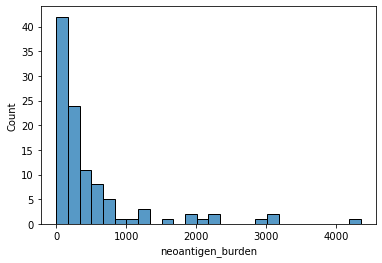

In [94]:
# lung 데이터프레임의 neoantigen_burden컬럼 값을 가지고 histplot 그림
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(lung['neoantigen_burden'])
plt.show()
plt.close()

### `np.log()`와 `np.log1p()`
여기 셀에 `np.log()`와 `np.log1p()`를 찾아본 후, 설명을 적으시오 

/opt/anaconda3/envs/lab/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='neoantigen_burden', ylabel='Count'>

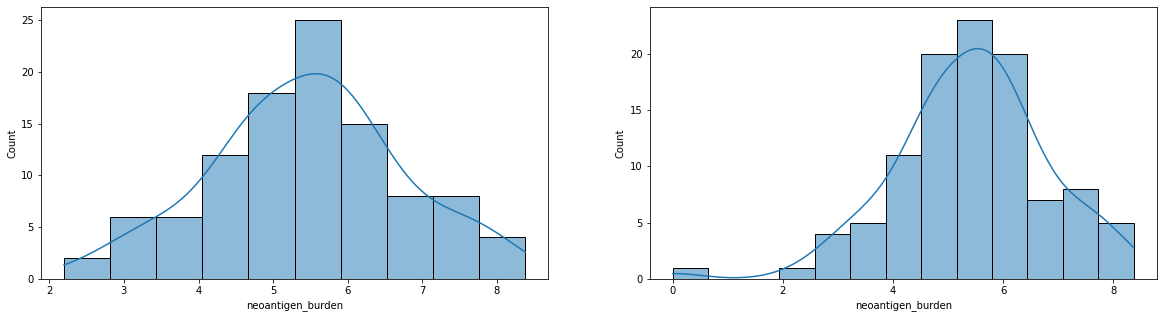

In [107]:
# `lung['neoantigen_burden']`에 `np.log()`와 `np.log1p()`을 취해보고 차이점을 살펴보세요.
# 곡선은 kde를 설정해주면 됩니다.
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
sns.histplot(np.log(lung['neoantigen_burden']), ax=axes[0], kde=True)
sns.histplot(np.log1p(lung['neoantigen_burden']), ax=axes[1], kde=True)

In [105]:
# 우리는 np.log1p를 취한 값을 사용할 것입니다.
lung_neoantigen_burden = np.log1p(lung['neoantigen_burden'])
lung['log_neoantigen_burden'] = lung_neoantigen_burden
lung.head()

,sample,pd1_response,neoantigen_burden,answer,log_neoantigen_burden
0,1,PD,160.0,0,5.081404
1,2,PR,216.0,1,5.379897
2,3,SD,32.0,0,3.496508
3,4,SD,263.0,0,5.575949
4,5,SD,451.0,0,6.113682


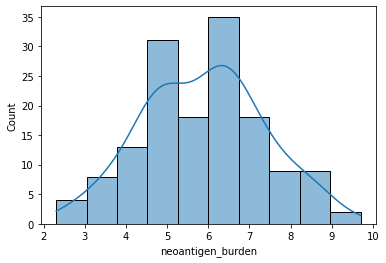

In [106]:
# melanoma에서도 np.log1p를 취한 값을 사용할 것입니다.
melanoma_neoantigen_burden = np.log1p(melanoma['neoantigen_burden'])
sns.histplot(melanoma_neoantigen_burden, kde=True)
plt.show()
plt.close()

In [108]:
melanoma['log_neoantigen_burden'] = melanoma_neoantigen_burden
melanoma.head()

,sample,pd1_response,neoantigen_burden,answer,log_neoantigen_burden
0,Pat02,response,244,1,5.501258
1,Pat03,nonresponse,475,0,6.165418
2,Pat04,response,568,1,6.343880
3,Pat06,nonresponse,382,0,5.948035
4,Pat07,response,147,1,4.997212
